**Machine Learning and Data Analysis of MPG dataset**
> Goal of this project is to analysis the data and build a machine learning model that predicts mpg when other variables are given.

**Loading Initial Libraries**

In [309]:
#pandas
import pandas as pd

#numpy
import numpy as np

#seaborn
import seaborn as sns

#matplotlib
import matplotlib.pyplot as plt
from matplotlib import colormaps

#warnings
import warnings
warnings.filterwarnings("ignore")


**Load DataSet**

In [310]:
#loading data from seaborn example dataset
df = sns.load_dataset("mpg")

In [311]:
#Data analysis(Skimming)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [312]:
#Data analysis(Skimming)
df.info()
#summary - don't need "name" column for any calculation, horsepower has some nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [313]:
#Droping "name" column and inplace
df.drop(labels = "name", axis = 1, inplace = True)

In [314]:
#Dataframe/Data analysis(Skimming)
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


**Data Processing**

In [315]:
#Checking for nulls
df.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model_year      False
origin          False
dtype: bool

In [316]:
#Checking for nulls, sums
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [317]:
#a way to check for null values and  their associates (not recommended), case based
df[df["horsepower"].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,usa
126,21.0,6,200.0,NaN,2875,17.0,74,usa
330,40.9,4,85.0,NaN,1835,17.3,80,europe
336,23.6,4,140.0,NaN,2905,14.3,80,usa
354,34.5,4,100.0,NaN,2320,15.8,81,europe
374,23.0,4,151.0,NaN,3035,20.5,82,usa


In [318]:
#checking for nulls, universal and recommended
df[df.isnull().any(axis = 1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,usa
126,21.0,6,200.0,NaN,2875,17.0,74,usa
330,40.9,4,85.0,NaN,1835,17.3,80,europe
336,23.6,4,140.0,NaN,2905,14.3,80,usa
354,34.5,4,100.0,NaN,2320,15.8,81,europe
374,23.0,4,151.0,NaN,3035,20.5,82,usa


In [319]:
#droping null values (axis = 0 by default for rows, as axis = 1 here, so columns will be dropped)
df.dropna(inplace = True)
#droping null values is better in this case as only 6 rows have null values out of 300+ values
#in cases where there is more null values compared to data, [fillna] can be used 

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 27.6+ KB


**Univariate Analysis**

In [321]:
#Univariate Analysis will be useful for understanding data and their characteristics for single variable

In [322]:
#checking unique values in a variable(column, cylinders)
df["cylinders"].unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [323]:
#showing all number of values in the selected variable(column, cylinders)
df["cylinders"].value_counts()

cylinders
4    199
8    103
6     83
3      4
5      3
Name: count, dtype: int64

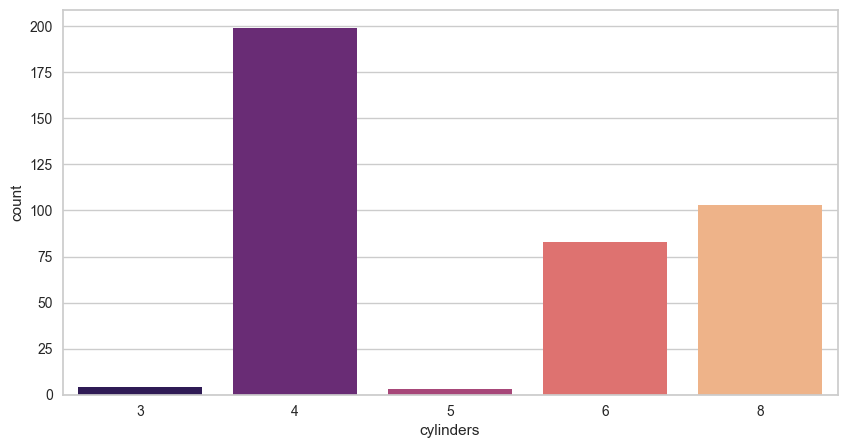

In [324]:
#data visualization of that selected variable(column, cylinders)
#for countplot or any plot for example, have to give x value for reference, and data can be automatically adjusted
plt.figure(figsize = (10,5))
sns.countplot(x = df["cylinders"], data = df, palette = "magma")
plt.show()
#summary - Most of the cars in the data sample has 4 cylinders.

In [325]:
#data visualization of that selected variable(column, model_year), preadjut, cause proper address of the year is missing
#adding 1900 to the data
df["model_year"] = df["model_year"] + 1900
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,1970,usa
1,15.0,8,350.0,165.0,3693,11.5,1970,usa
2,18.0,8,318.0,150.0,3436,11.0,1970,usa
3,16.0,8,304.0,150.0,3433,12.0,1970,usa
4,17.0,8,302.0,140.0,3449,10.5,1970,usa


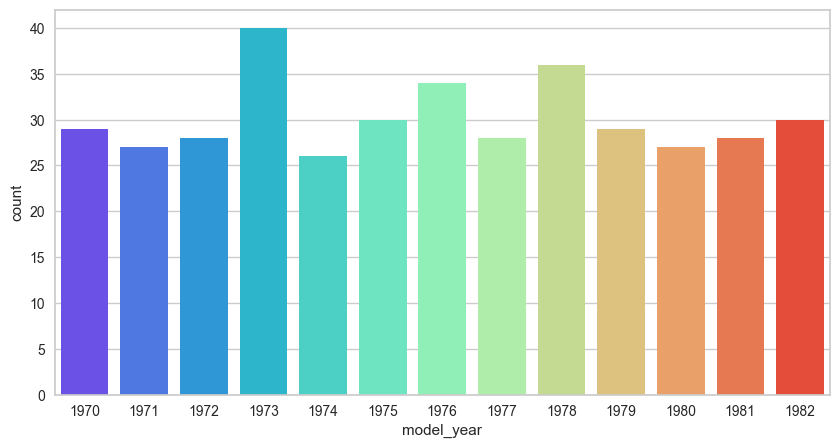

In [326]:
#data visualization of that selected variable(column, model_year)
plt.figure(figsize = (10,5))
sns.countplot(x = df["model_year"], data = df, palette = "rainbow")
plt.show()
#summary - 1973 model year cars are dominant in data sample

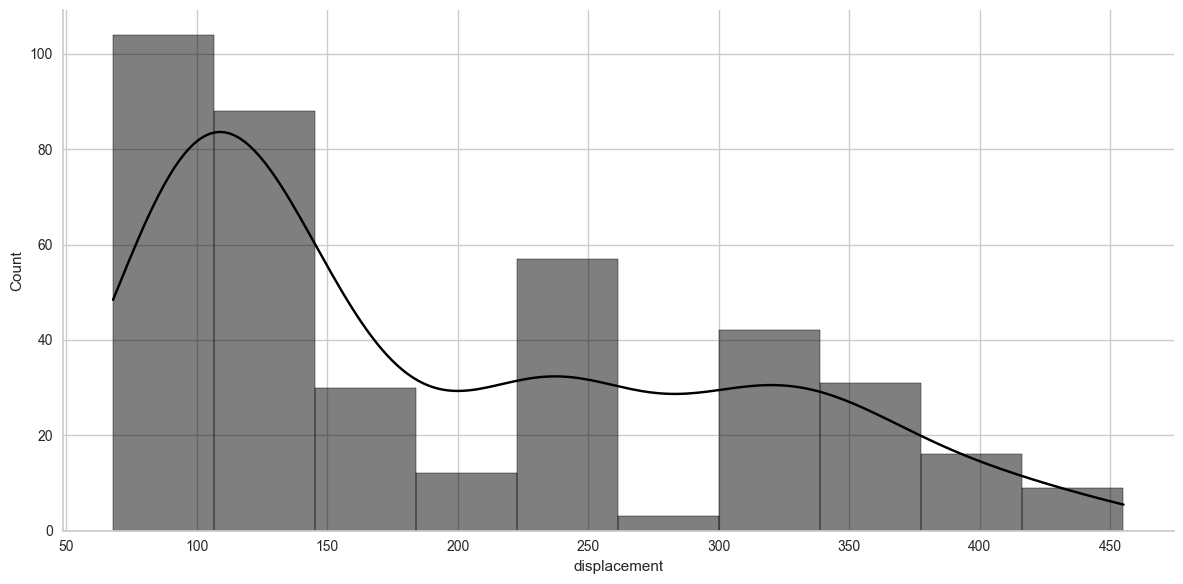

In [327]:
#data visualization of that selected variable(column, displacement)
sns.displot(x = df["displacement"], data = df, kde = True, height = 6, aspect = 2, color = "black")
plt.show()
#summary - number of sub 150 displacement are dominant in data sample for displacement category

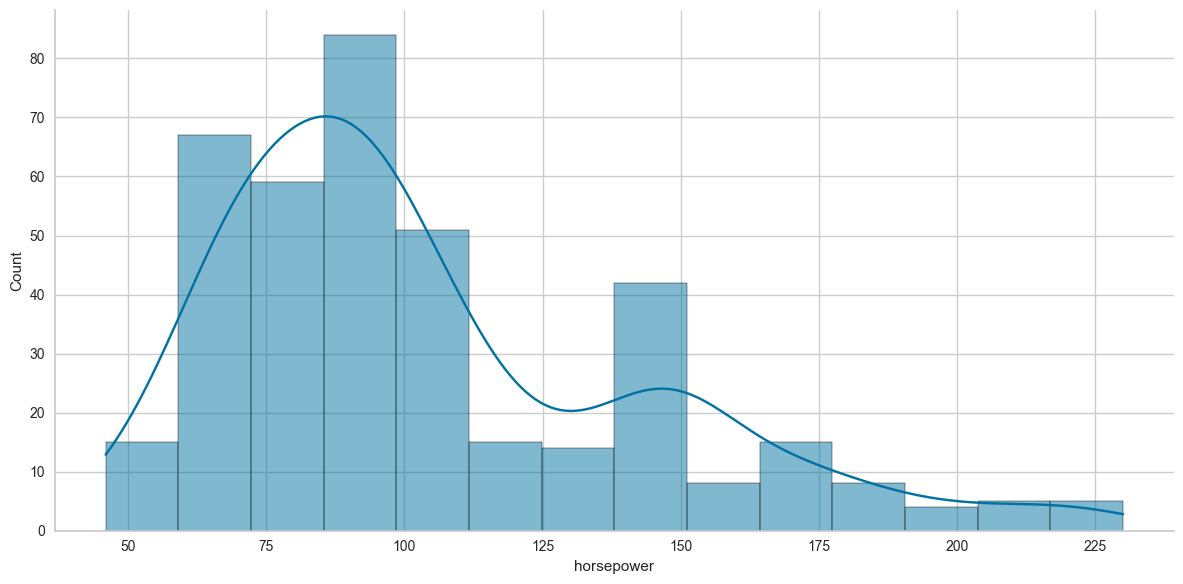

In [328]:
#data visualization of that selected variable(column, horsepower)
sns.displot(x = df["horsepower"], data = df, kde = True, height = 6, aspect = 2)
plt.show()
#summary - number of 70 to 110 horsepower cars are dominant in data sample for horsepower category

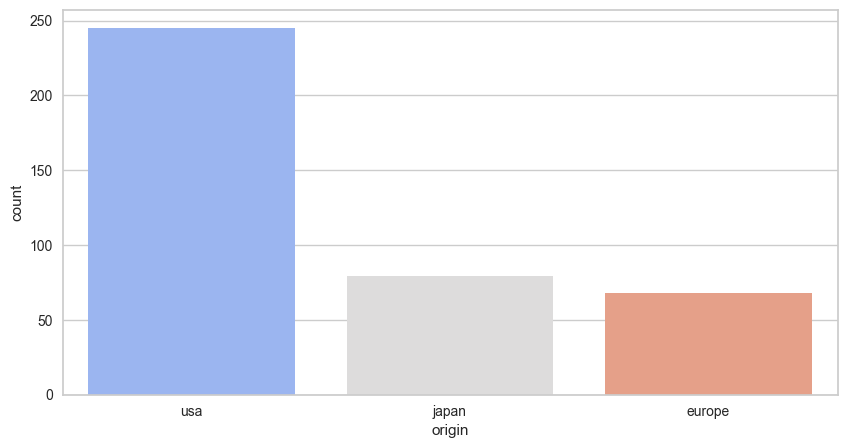

In [329]:
#data visualization of that selected variable(column, origin country)
plt.figure(figsize = (10,5))
sns.countplot(x = df["origin"], data = df, palette = "coolwarm")
plt.show()
#summary - number of usa made cars are dominant in data sample

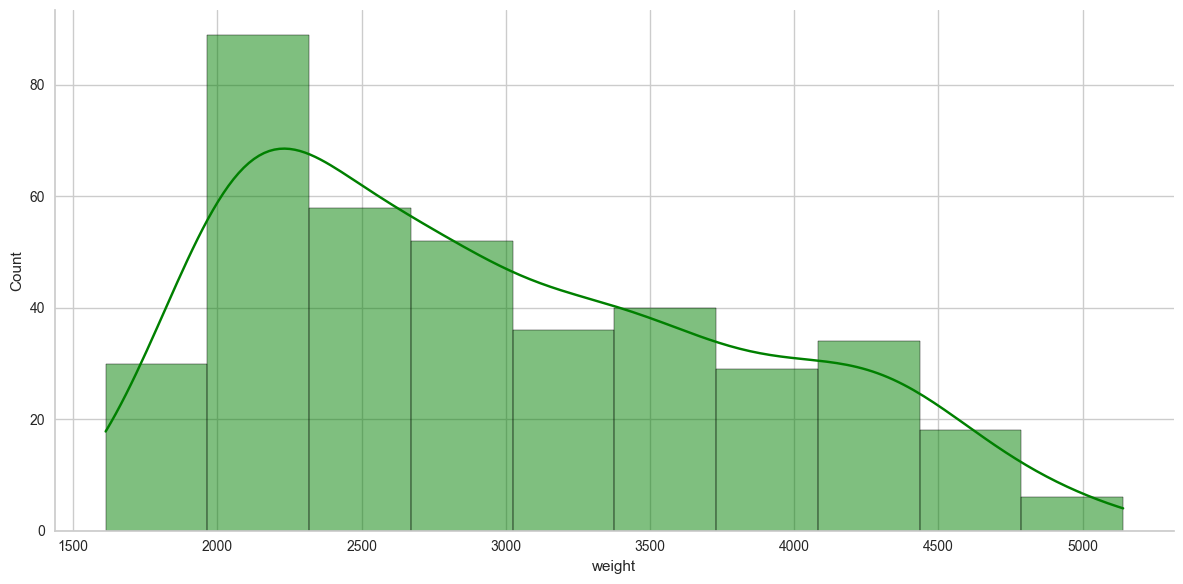

In [330]:
#data visualization of that selected variable(column, weight)
sns.displot(x = df["weight"], data = df, kde = True, height = 6, aspect = 2, color = "green")
plt.show()
#summary - number of 2000 to 2500 weight unit cars are dominant in data sample for weight category

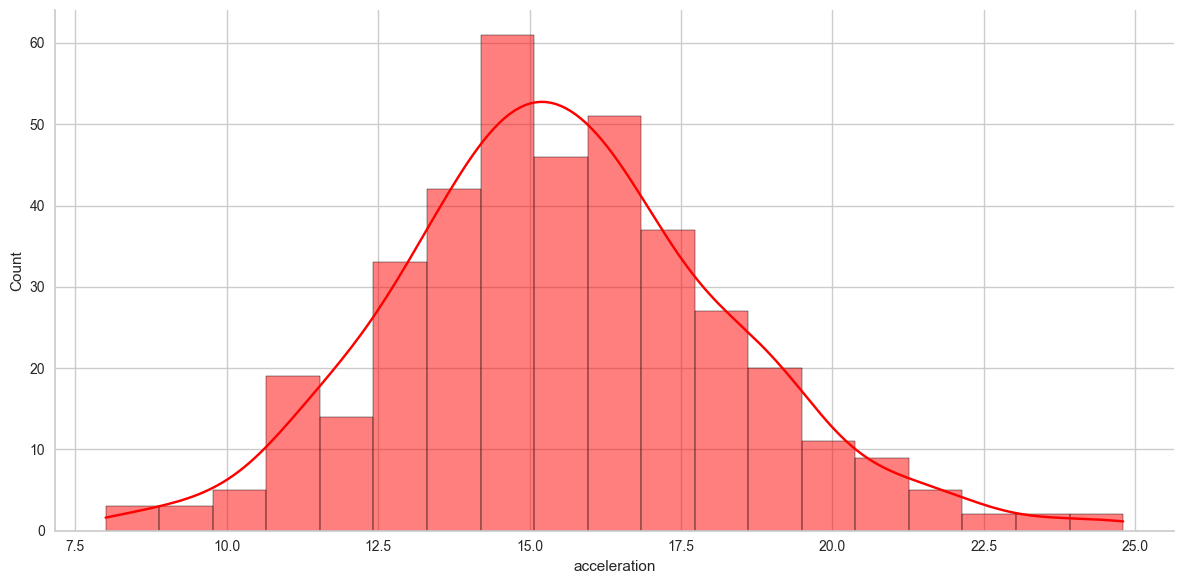

In [331]:
#data visualization of that selected variable(column, acceleration)
sns.displot(x = df["acceleration"], data = df, kde = True, height = 6, aspect = 2, color = "red")
plt.show()
#summary - most of the cars acceleration ranges from 12.5 to 17.5

In [332]:
# Univariate Analysis Summary

# Form dataset it seems, in general, -------------->

# Most of the cars in the data sample has 4 cylinders.
# 1973 model year cars are dominant in data sample (not that significant)
# sub 150 displacement are dominant in data sample for displacement category
# number of 70 to 110 horsepower cars are dominant in data sample for horsepower category
# number of usa made cars are dominant in data sample
# number of 2000 to 2500 weight unit cars are dominant in data sample for weight category
# most of the cars acceleration ranges from 12.5 to 17.5

**Bivariate Analysis**

In [333]:
#Bivariate Analysis will be useful for understanding relations between two variables and will give greater insight

In [334]:
#It is better do to these sort of analysis so that relations of "dependable variable" is clearly visible with other independable variables

In [335]:
#For Bivariate Analysis, Boxplot is very suitable

In [336]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,1970,usa
1,15.0,8,350.0,165.0,3693,11.5,1970,usa
2,18.0,8,318.0,150.0,3436,11.0,1970,usa
3,16.0,8,304.0,150.0,3433,12.0,1970,usa
4,17.0,8,302.0,140.0,3449,10.5,1970,usa


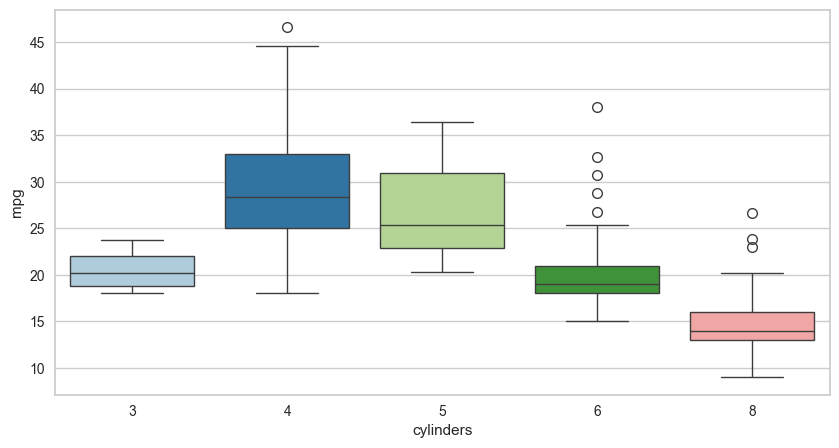

In [337]:
#data visualization, relation between mpg and cylinders
plt.figure(figsize = (10,5))
sns.boxplot(data = df, x = df["cylinders"], y = df["mpg"], palette = "Paired")
plt.show()
#Summary - form dataset it seems, in general cars with 4 cylinders has the highest mileage (mpg)

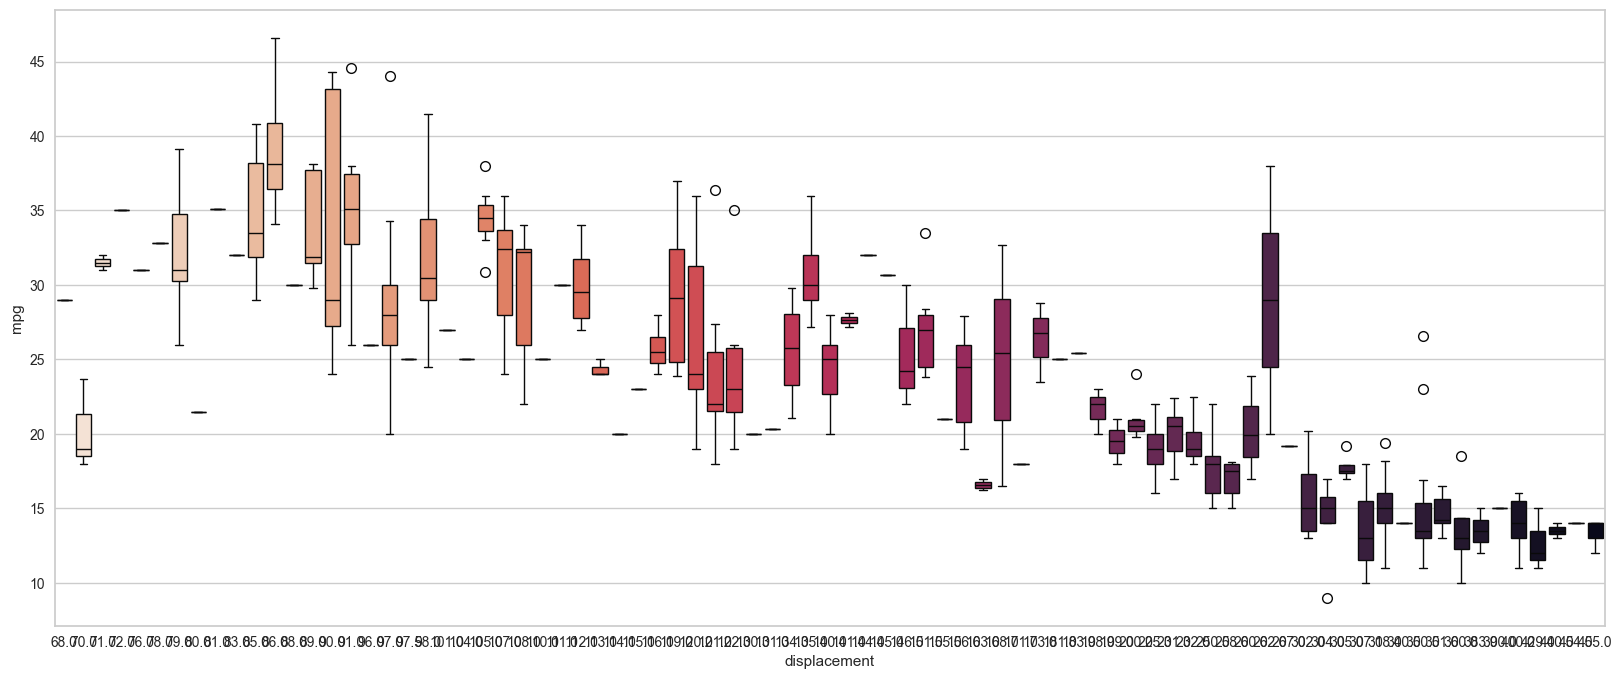

In [338]:
#data visualization, relation between mpg and displacement
plt.figure(figsize = (20,8))
sns.boxplot(data = df, x = df["displacement"], y = df["mpg"], palette = "rocket_r")
plt.show()
#Summary - form dataset it seems, in general mileage reduced as displacement increases, though not significantly

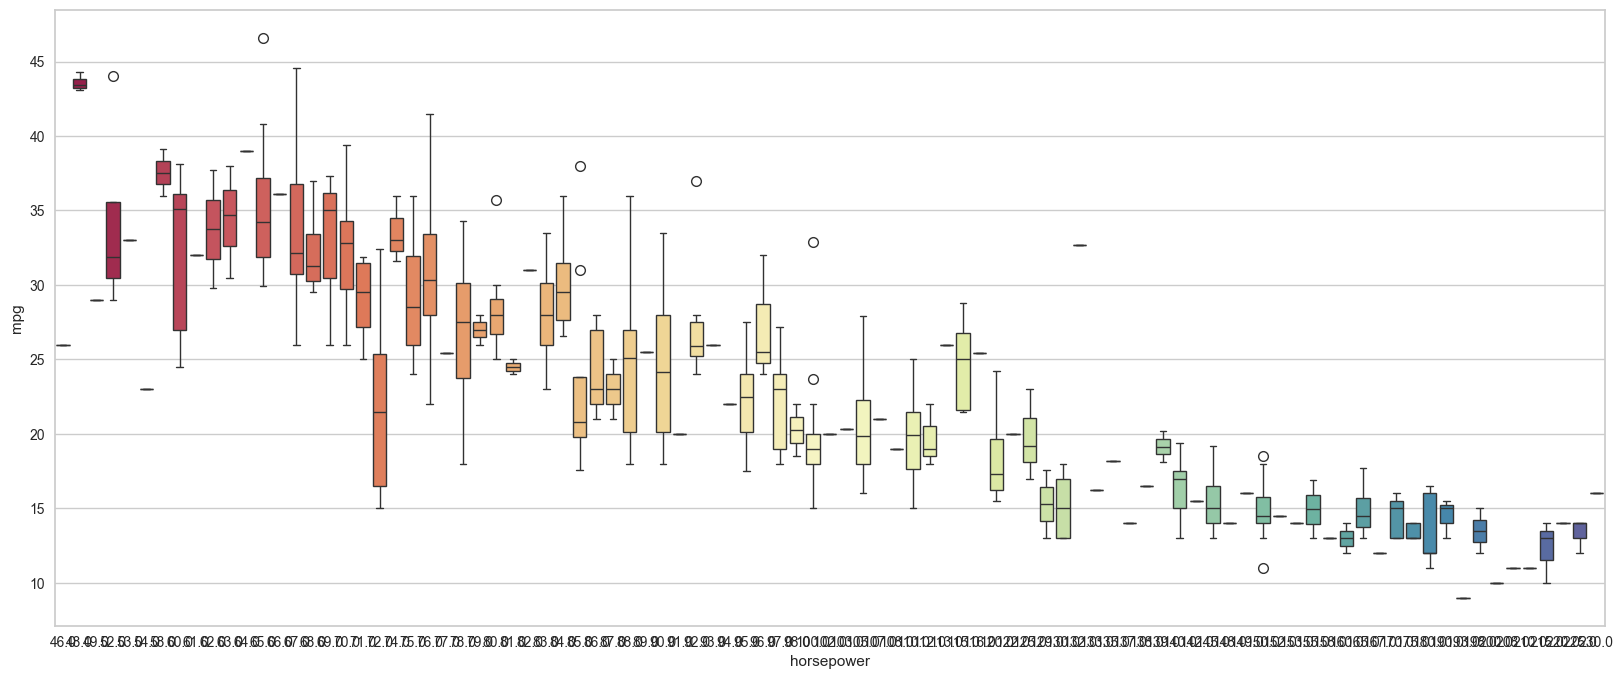

In [339]:
#data visualization, relation between mpg and horsepower
plt.figure(figsize = (20,8))
sns.boxplot(data = df, x = df["horsepower"], y = df["mpg"], palette = "Spectral")
plt.show()
#Summary - form dataset it seems, in general mileage drops as horsepower increases. Also this data strongly corelates with relation between mpg and displacement

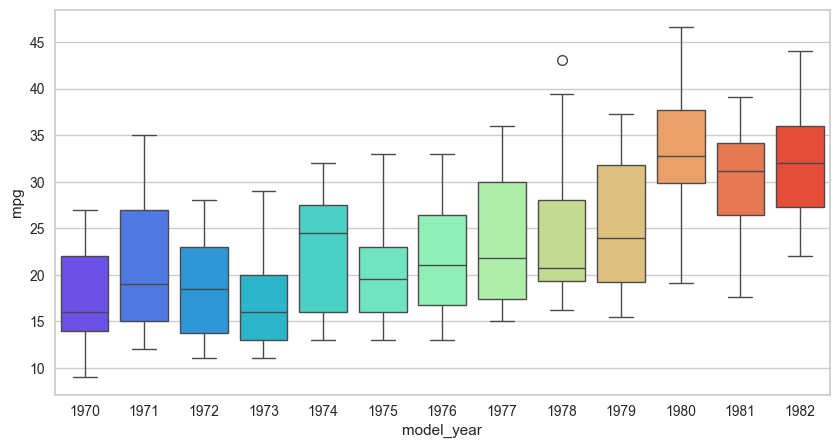

In [340]:
#data visualization, relation between mpg and model_year
plt.figure(figsize = (10,5))
sns.boxplot(data = df, x = df["model_year"], y = df["mpg"], palette = "rainbow")
plt.show()
#Summary - form dataset it seems, in general mileage increases in latest cars

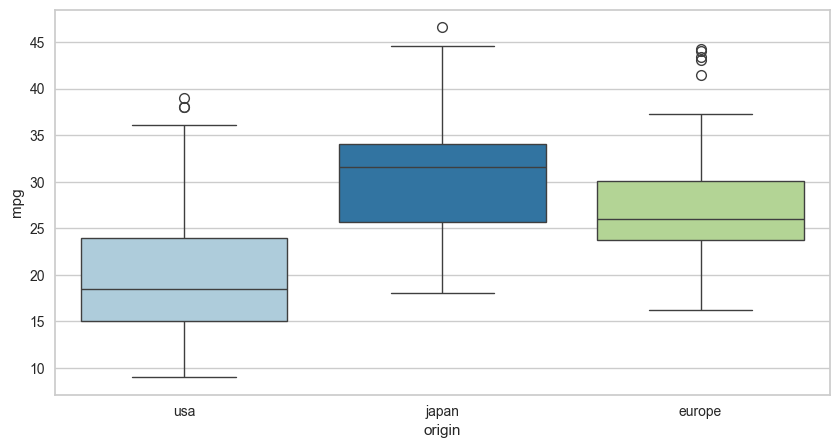

In [341]:
#data visualization, relation between mpg and origin
plt.figure(figsize = (10,5))
sns.boxplot(data = df, x = df["origin"], y = df["mpg"], palette = "Paired")
plt.show()
#Summary - form dataset it seems, in general cars manufactured in japan has better mileage

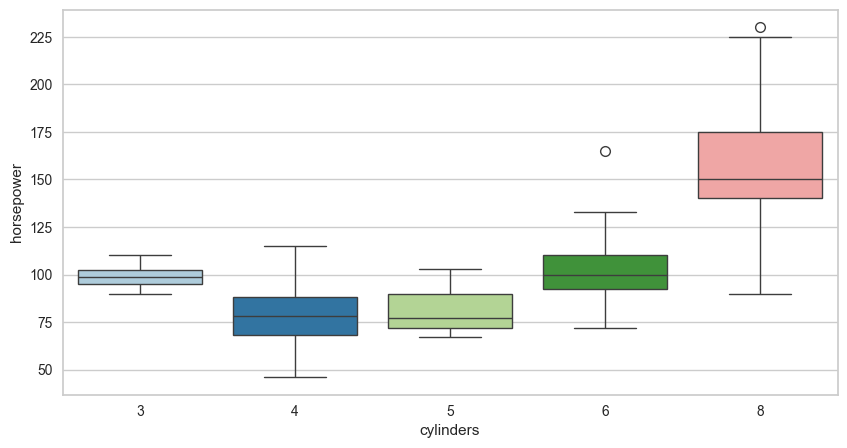

In [342]:
#data visualization, relation between cylinders and horsepower
plt.figure(figsize = (10,5))
sns.boxplot(data = df, x = df["cylinders"], y = df["horsepower"], palette = "Paired")
plt.show()
#Summary - form dataset it seems, in general cars with more cylinders has more horsepower

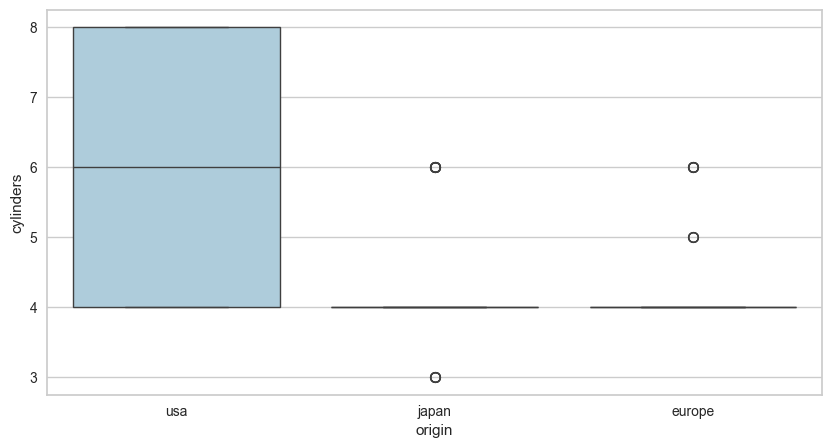

In [343]:
#data visualization, relation between origin and cylinders
plt.figure(figsize = (10,5))
sns.boxplot(data = df, x = df["origin"], y = df["cylinders"], palette = "Paired")
plt.show()
#Summary - form dataset it seems, in general cars originated in usa has diverse engine cylinder configurations, but japan and europe mostly has 4 cylinders

In [344]:
# Bivariate Analysis Summary

# form dataset it seems, in general, -------------->

# cars with 4 cylinders has the highest mileage (mpg)
# mileage reduced as displacement increases, though not significantly
# mileage drops as horsepower increases. Also this data strongly corelates with relation between mpg and displacement
# mileage increases in latest cars
# cars manufactured in japan has better mileage
# cars with more cylinders has more horsepower
# cars originated in usa has diverse engine cylinder configurations, but japan and europe mostly has 4 cylinders

**Multivariate Analysis**

In [345]:
#Multivariate Analysis is very useful to find patterns and correlations between multiple variables in complex scenarios.

In [346]:
#seaborn.implot() will be helpful for Multivariate Analysis and, will give much detail information about variables and their relations.

In [347]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,1970,usa
1,15.0,8,350.0,165.0,3693,11.5,1970,usa
2,18.0,8,318.0,150.0,3436,11.0,1970,usa
3,16.0,8,304.0,150.0,3433,12.0,1970,usa
4,17.0,8,302.0,140.0,3449,10.5,1970,usa


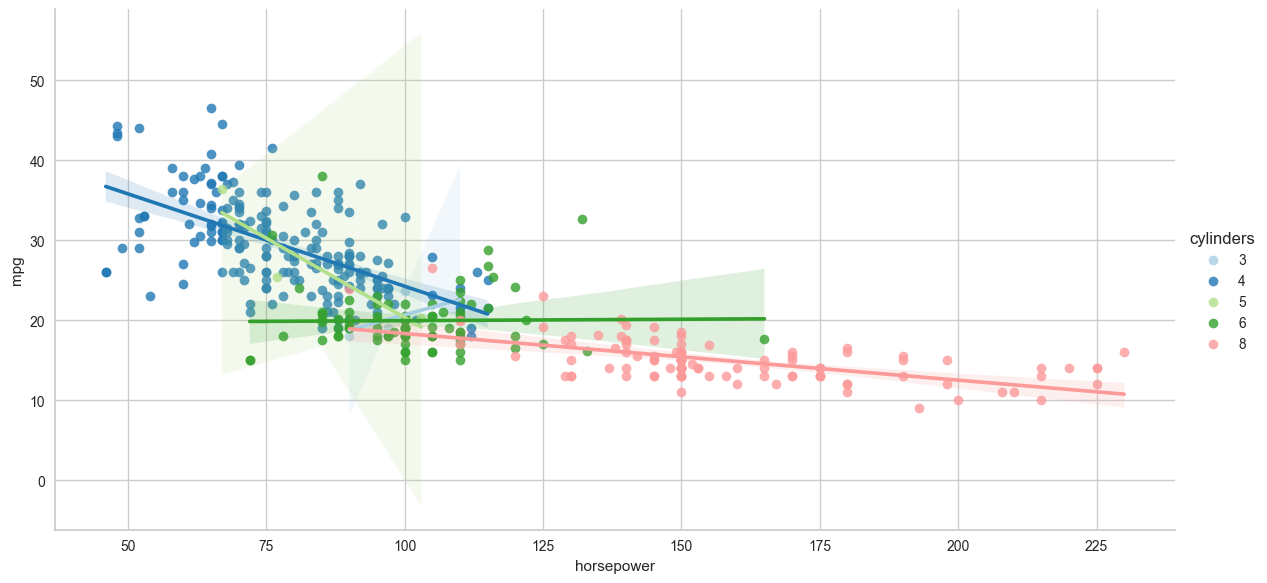

In [348]:
#data visualization, relation between horsepower, mpg and cylinders
sns.lmplot(data = df, x = "horsepower", y = "mpg", hue = "cylinders", palette = "Paired", height = 6, aspect = 2)
plt.show()
#Summary - form dataset it seems, in general mileage drops for cars with 4, 5, and 8 cylinders as horsepower increases, but for cars with 3 and 6 cylinders, mileage stays relatively same as horsepower increases.

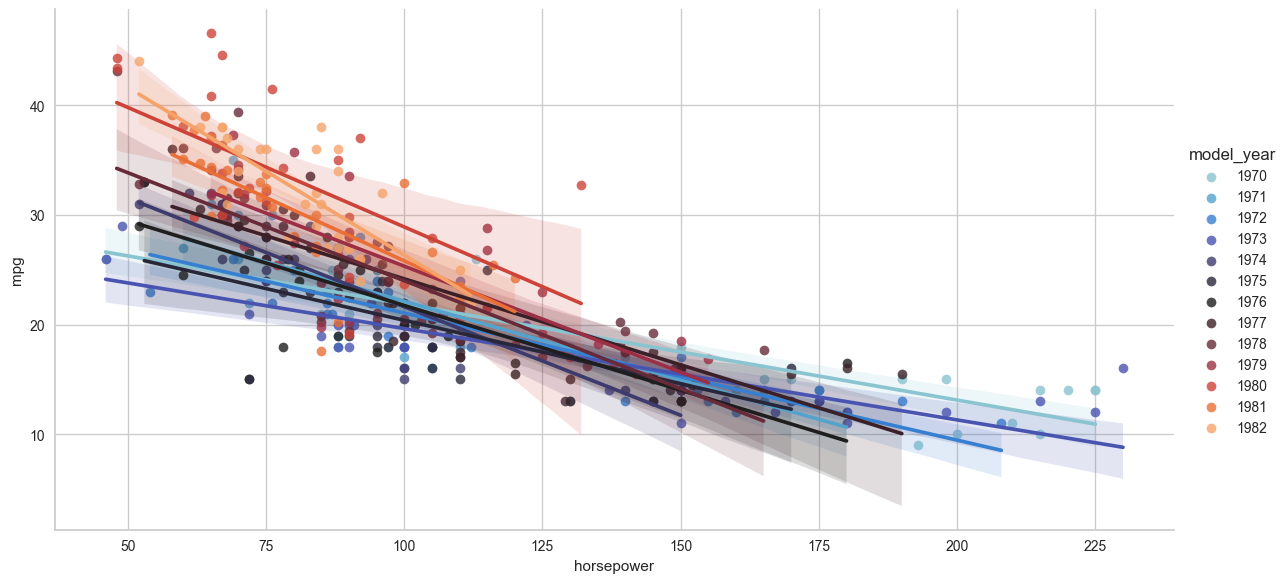

In [349]:
#data visualization, relation between horsepower, mpg and model_year
sns.lmplot(data = df, x = "horsepower", y = "mpg", hue = "model_year", palette = "icefire", height = 6, aspect = 2)
plt.show()
#Summary - form dataset it seems, in general new model cars have higher mileage, but as horsepower increases new model cars mileage drops sharply compared to old model cars.

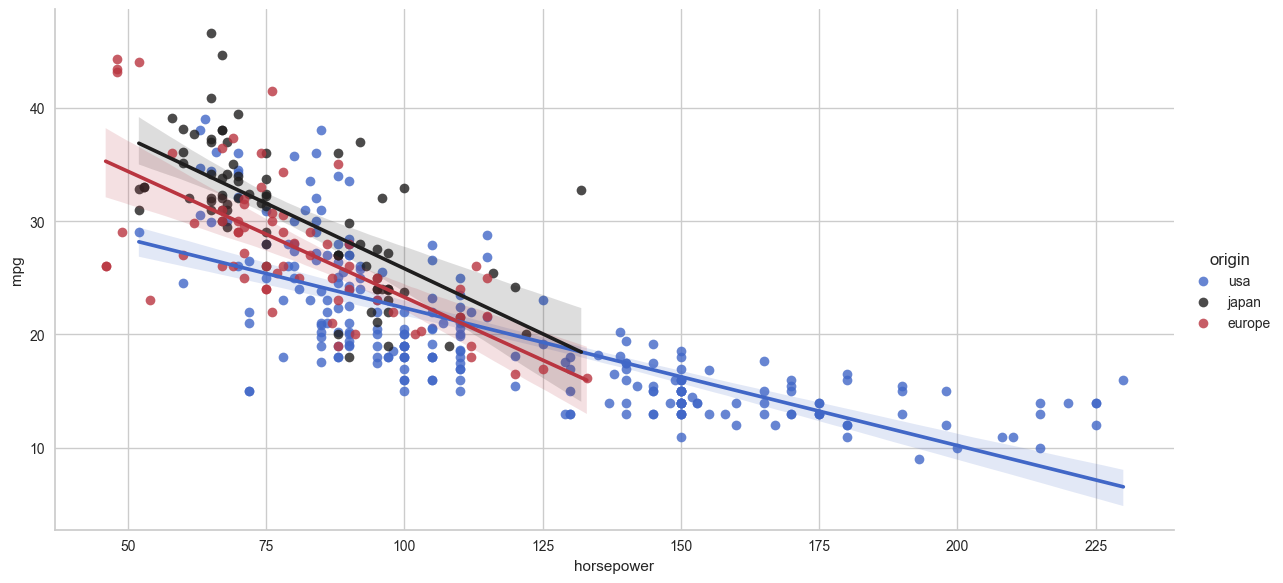

In [350]:
#data visualization, relation between horsepower, mpg and origin
sns.lmplot(data = df, x = "horsepower", y = "mpg", hue = "origin", palette = "icefire", height = 6, aspect = 2)
plt.show()
#Summary - form dataset it seems, in general cars from japan and europe has lower horsepower (capped at 130hp) but greater mileage compared to usa made cars. Also japan made cars have in general highest mileage and have same drop rate of mileage as europe made cars as horsepower increases.

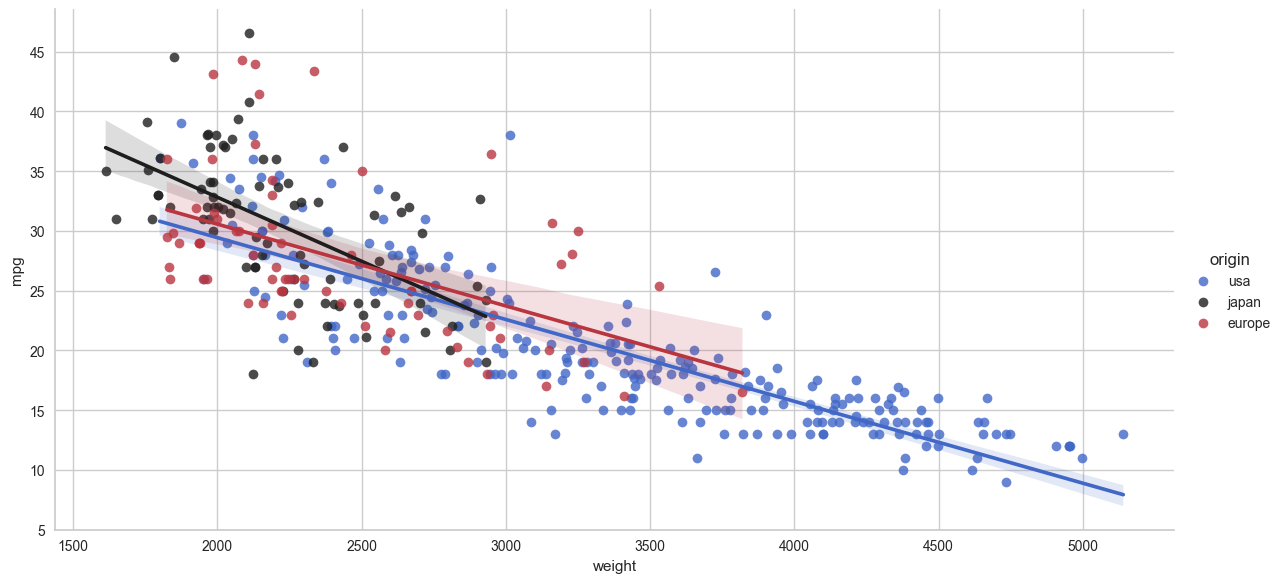

In [351]:
#data visualization, relation between weight, mpg and origin
sns.lmplot(data = df, x = "weight", y = "mpg", hue = "origin", palette = "icefire", height = 6, aspect = 2)
plt.show()
#Summary - form dataset it seems, in general japan made cars are low in weight and have best mileage, with europe made cars have medium range weight and mileage, and usa made cars are in generally more heavy and tend to have low mileage

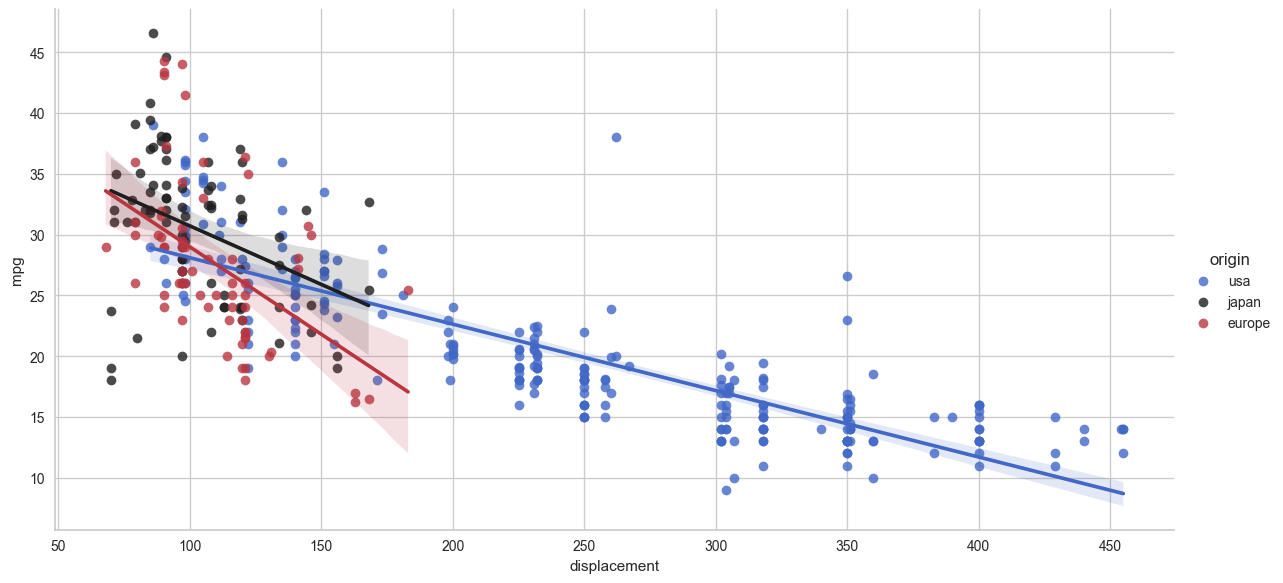

In [352]:
#data visualization, relation between displacement, mpg and origin
sns.lmplot(data = df, x = "displacement", y = "mpg", hue = "origin", palette = "icefire", height = 6, aspect = 2)
plt.show()
#Summary - form dataset it seems, in general japan and europe made smaller engine cars with japan made slightly smaller engine cars compared to europeen cars. But usa made cars has more diverse capacity of engine.

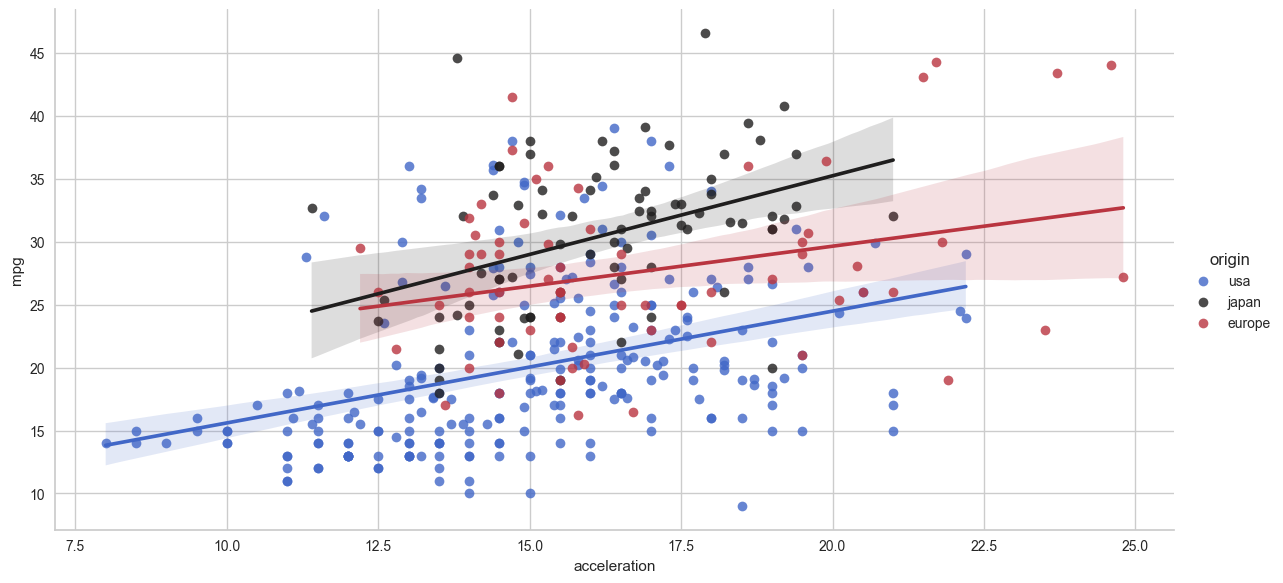

In [353]:
#data visualization, relation between acceleration, mpg and origin
sns.lmplot(data = df, x = "acceleration", y = "mpg", hue = "origin", palette = "icefire", height = 6, aspect = 2)
plt.show()
#Summary - form dataset it seems, in general japan and europe made cars have better mileage and acceleration compared to usa made cars.

In [354]:
# Multivariate Analysis Summary

# form dataset it seems, in general, -------------->

# mileage drops for cars with 4, 5, and 8 cylinders as horsepower increases, but for cars with 3 and 6 cylinders, mileage stays relatively same as horsepower increases.
# new model cars have higher mileage, but as horsepower increases new model cars mileage drops sharply compared to old model cars.
# cars from japan and europe has lower horsepower (capped at 130hp) but greater mileage compared to usa made cars. Also japan made cars have in general highest mileage and have same drop rate of mileage as europe made cars as horsepower increases.
# japan made cars are low in weight and have best mileage, with europe made cars have medium range weight and mileage, and usa made cars are in generally more heavy and tend to have low mileage.
# japan and europe made smaller engine cars with japan made slightly smaller engine cars compared to europeen cars. But usa made cars has more diverse capacity of engine.
# japan and europe made cars have better mileage and acceleration compared to usa made cars.

**Heatmap of Correlation Matrix**

In [355]:
#pandas.corr() is very useful for finding out correlation between variables
df.corr(numeric_only = True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


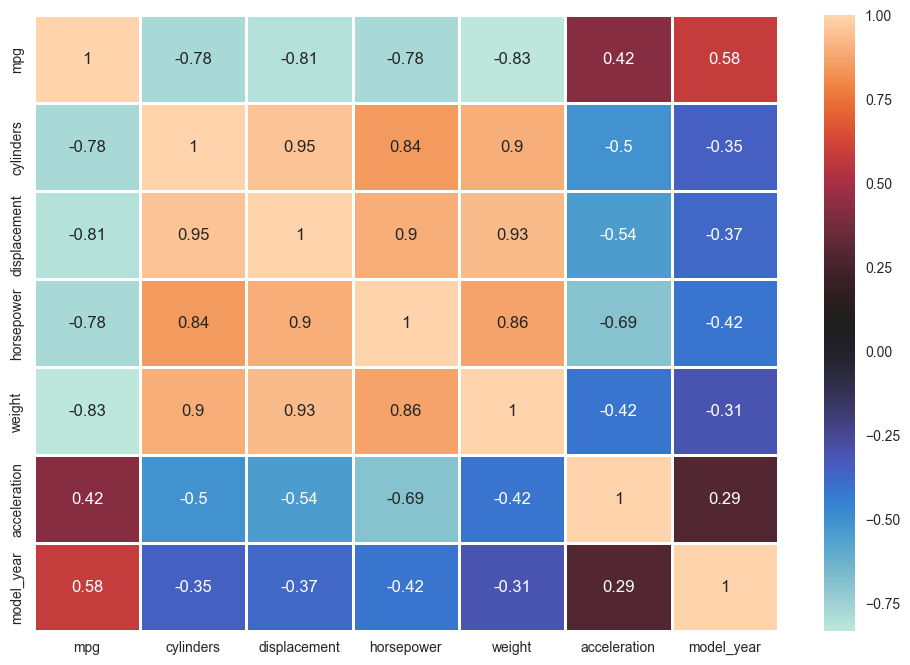

In [356]:
# along with corr(), heatmap and proper color scheme it will provide much detail insight for modeling data
plt.figure(figsize = (12,8))
Corr_Hmap = sns.heatmap(data = df.corr(numeric_only = True), annot = True, cmap = "icefire", linewidths = 1)
plt.show()
Corr_Hmap.figure.savefig('Correlation_Heatmap.png')
#for this heatmap palette - icefire or spectral would be great.

# conclusions ------------>
# acceleration variable can be removed from modeling, because it lacks strong correlation to the mileage data/variable (sub |0.8|)
# strong correlations among feature variables(cylinders,displacement,horsepower), it can cause overfitting and complication in modeling, 
# one feature variable is removeable, highest correlation among feature value is displacement, so it has to go.

In [357]:
#conclusion of Heatmap of Correlation Matrix to action
df.drop(columns = ["acceleration", "displacement"], inplace = True)

In [358]:
#checking
df.head()
#this DataFrame has categorical/non-numerical (origin variable) values still. This will not work for modeling. It can be converted to binary status with pandas.get_dummies(). 

,mpg,cylinders,horsepower,weight,model_year,origin
0,18.0,8,130.0,3504,1970,usa
1,15.0,8,165.0,3693,1970,usa
2,18.0,8,150.0,3436,1970,usa
3,16.0,8,150.0,3433,1970,usa
4,17.0,8,140.0,3449,1970,usa


In [359]:
#categorical to binary conversation with usable dataset for modeling
df = pd.merge(left = df, right = (pd.get_dummies(df["origin"], dtype = "int")), left_index = True, right_index = True)
df.drop(columns = ["origin"], inplace = True)

In [360]:
#checking
df.head()

,mpg,cylinders,horsepower,weight,model_year,europe,japan,usa
0,18.0,8,130.0,3504,1970,0,0,1
1,15.0,8,165.0,3693,1970,0,0,1
2,18.0,8,150.0,3436,1970,0,0,1
3,16.0,8,150.0,3433,1970,0,0,1
4,17.0,8,140.0,3449,1970,0,0,1


In [361]:
#For this dataset, cars age would be more appropriate then model year.
from datetime import datetime
Today = datetime.today()
df["model_year"] = Today.year - df["model_year"]
df.rename(columns={"model_year": "cars age"})

,mpg,cylinders,horsepower,weight,cars age,europe,japan,usa
0,18.0,8,130.0,3504,54,0,0,1
1,15.0,8,165.0,3693,54,0,0,1
2,18.0,8,150.0,3436,54,0,0,1
3,16.0,8,150.0,3433,54,0,0,1
4,17.0,8,140.0,3449,54,0,0,1
...,...,...,...,...,...,...,...,...
393,27.0,4,86.0,2790,42,0,0,1
394,44.0,4,52.0,2130,42,1,0,0
395,32.0,4,84.0,2295,42,0,0,1
396,28.0,4,79.0,2625,42,0,0,1


**Modeling for Machine Learning**

**Split**

In [362]:
#For Modeling, this dataframe needs to be seperated into two parts, feature(independent, X) and label(dependent, y) variables.
X = df.drop(columns = ["mpg"])
y = df.mpg

In [363]:
#Now, data needs to be split into train and test data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 28) #setting 15% data as test data

**Train**

In [364]:
#Now importing the main estimator model for training data
from sklearn.linear_model import LinearRegression

In [365]:
#Assigning estimator model to a model variable
Model_variable = LinearRegression()

In [366]:
#Actual training of data using fit() function
Model_variable.fit(X_train, y_train)

LinearRegression()

In [367]:
#checking intercept of the trained linear model
Model_variable.intercept_

78.8159954386937

In [368]:
#checking coefficients of the trained linear model
Model_variable.coef_

array([ 0.10809689, -0.00916037, -0.00581162, -0.77494181,  0.37955582,
        0.90249976, -1.28205557])

In [369]:
#checking coefficients of the trained linear model with according data variables
df.columns.values

array(['mpg', 'cylinders', 'horsepower', 'weight', 'model_year', 'europe',
       'japan', 'usa'], dtype=object)

In [370]:
#checking coefficients of the trained linear model with according data variables
pd.DataFrame(data = Model_variable.coef_, index = X.columns.values, columns = ["Coefficients"])
#conclusions - The larger the values(absolute) of coefficients are, the larger the significance of the according variable are in the model.

,Coefficients
cylinders,0.108097
horsepower,-0.009160
weight,-0.005812
model_year,-0.774942
europe,0.379556
japan,0.902500
usa,-1.282056


**Test**

In [371]:
#Now to get predicted y values, predict() function should be used
y_predict = Model_variable.predict(X_test)

In [372]:
#making a dataframe of predicted and actual y values for comparison
value_sum_up = {"Predicted Y": y_predict,
                "Actual Y": y_test}

model_values_comparison = pd.DataFrame(value_sum_up)

In [373]:
#observing some values for comparison
model_values_comparison.sample(15)

,Predicted Y,Actual Y
258,21.930096,20.6
357,30.714971,32.9
68,10.517987,13.0
129,29.457396,31.0
205,29.742615,28.0
244,32.004859,43.1
156,11.740679,16.0
193,22.738736,24.0
10,14.287805,15.0
176,20.724839,19.0


**Evaluating Models Performance and Metrics**

In [374]:
#For evaluation, desired metrics needs to be imported from the appropriate library
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

In [375]:
#Though it can be checked individually, it is efficient that a custom function be called which checks all the desired metrics
#it is possible in this case because all the metrics use almost same input values

def Metrics_Evaluation(y_actual, y_predicted):
    MAE = mean_absolute_error(y_actual, y_predicted)
    MSE = mean_squared_error(y_actual, y_predicted)
    RMSE = root_mean_squared_error(y_actual, y_predicted)
    R2_Score = r2_score(y_actual, y_predicted)

    return print("Mean Absolute Error: " + str(MAE) + "\n" + "\n" +
                "Mean Squared Error: " + str(MSE) + "\n" + "\n" +
                "Root Mean Squared Error: " + str(RMSE) + "\n" + "\n" +
                "R2 Score: " + str(R2_Score)
                )

In [376]:
#now for Evaluation
Metrics_Evaluation(y_test, y_predict)

Mean Absolute Error: 2.284764940526103

Mean Squared Error: 8.739409613013393

Root Mean Squared Error: 2.95624924744403

R2 Score: 0.8573905070578436


**Visual Presentation of The Model and It's Metrics**

In [377]:
#yellowbrick is a awesome library for Visual Presentation of ML models and it's metrics
#It works with scikit-learn lib

In [378]:
#First need to import usable functions from yellowbrick lib
from yellowbrick.regressor import PredictionError

In [379]:
#Assigning a variable for usage
YS_variable = PredictionError(Model_variable)

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

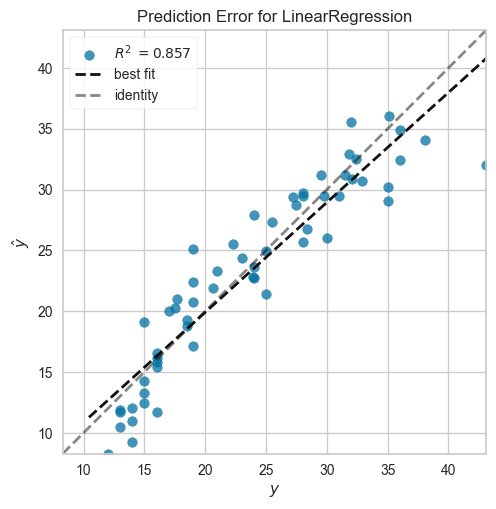

In [380]:
#now for PredictionError estiamtion
YS_variable.fit(X_train, y_train)
YS_variable.score(X_test, y_test)
YS_variable.show(outpath="Prediction_Error_Results.png")

In [381]:
#Now for visualizing another detailed plot, residuals plot from yellowbrick lib
from yellowbrick.regressor import ResidualsPlot

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

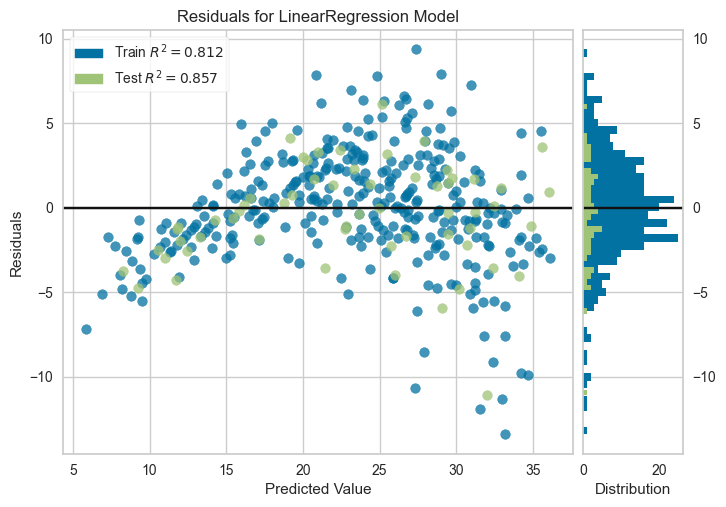

In [382]:
#Assigning a variable for it's usage
YS_ResPlot_variable = ResidualsPlot(Model_variable)

YS_ResPlot_variable.fit(X_train, y_train)
YS_ResPlot_variable.score(X_test, y_test)
YS_ResPlot_variable.show(outpath="Residuals_Results.png")